In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
seed = 0
np.random.seed(seed)

## Load movies data

In [2]:
DIR = "D:/R_D/pgit/recomender system/"
movies = pd.read_csv(DIR+"data/movies.dat", sep= "::", names= ["MovieID", "Title", "Genres"])
print(movies.shape)
movies.head()

(10681, 3)


,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Load rank data

In [ ]:
rank = pd.read_csv(DIR+"data/ratings.dat", sep= "::", names=["UserID", "MovieID", "Rating", "Timestamp"])

rank.head()

In [ ]:
rank["Timestamp"] = pd.to_datetime(rank['Timestamp'], unit='s')
rank.head()

In [ ]:
df = movies.merge(rank, left_on='MovieID', right_on='MovieID')
df = df[["MovieID", "Title", "Genres", "UserID", "Timestamp", "Rating"]] 
df.head()

In [ ]:
dist_rating = df[["Rating", "MovieID"]].groupby("Rating").count()
dist_rating.columns = ["Distr"]
dist_rating.head(10)

In [ ]:
movies_uniq = df["Title"].unique()
print(movies_uniq[0:10])

In [ ]:
users_uniq = df["UserID"].unique()
print(len(users_uniq))
print(users_uniq[0:10])

In [ ]:
med_rat_genre = df[["Genres", "Rating"]].groupby("Genres").median()
med_rat_genre = med_rat_genre.sort_values(by=['Rating'], ascending=False)
print(med_rat_genre.shape)
med_rat_genre.head(10)

In [ ]:
mean_rat_genre = df[["Genres", "Rating"]].groupby("Genres").mean()
mean_rat_genre = mean_rat_genre.sort_values(by=['Rating'], ascending=False)
print(mean_rat_genre.shape)
mean_rat_genre.head(10)

In [ ]:
#dumDf = pd.concat([df.drop('Genres', axis=1), df["Genres"].str.get_dummies(sep='|')], axis=1) 
#dumDf.head()
#dumDf.to_csv(DIR+"data/MoviesRating.csv", index=False)

In [3]:
df = pd.read_csv(DIR+"data/MoviesRating.csv")
df.head()

,MovieID,Title,UserID,Timestamp,Rating,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),5,1997-03-09 12:41:04,1.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),14,2005-12-03 01:06:47,3.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),18,2005-03-23 02:45:31,3.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),23,1996-12-02 16:18:02,5.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),24,1997-07-07 05:43:57,5.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns.values

In [4]:
def rating_genres(df, columns):
    rat_genre = pd.DataFrame()
    genres = df[columns].loc[df[columns[0]]==1]
    #rat_genre = (columns[0], genres["Rating"].median(), np.round(genres["Rating"].mean(), 3))
    rat_genre = { "Genres": columns[0],
                  "Median Rating": genres["Rating"].median(),
                  "Mean Rating": np.round(genres["Rating"].mean(), 3),
                  "Max Rating": genres["Rating"].max(),
                  "Min Rating": genres["Rating"].min()
                }
    return rat_genre

movies_genre = ['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 
                'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
                'Thriller', 'War', 'Western']

rat = pd.DataFrame()

for mv in movies_genre:
    
    columns = [mv, "Rating"]
    rat_genre = rating_genres(df, columns)
    #print(rat_genre)
    rat = rat.append(rat_genre, ignore_index=True)

rat = rat.sort_values(by="Median Rating", ascending=False)
rat.head(30)

,Genres,Max Rating,Mean Rating,Median Rating,Min Rating
10,Film-Noir,5.0,4.012,4.0,0.5
8,Drama,5.0,3.673,4.0,0.5
18,War,5.0,3.780,4.0,0.5
15,Romance,5.0,3.554,4.0,0.5
14,Mystery,5.0,3.678,4.0,0.5
13,Musical,5.0,3.562,4.0,0.5
12,IMAX,5.0,3.765,4.0,0.5
19,Western,5.0,3.556,4.0,0.5
7,Documentary,5.0,3.783,4.0,0.5
6,Crime,5.0,3.666,4.0,0.5


Nodes of graph: 
['Toronto', 'London', 'Berlin', 'New York']
Edges of graph: 
[('Toronto', 'London'), ('London', 'Berlin'), ('Berlin', 'New York')]


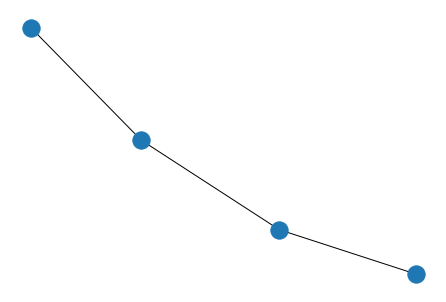

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.path_graph(4)
cities = {0:"Toronto",1:"London",2:"Berlin",3:"New York"}

H=nx.relabel_nodes(G,cities)
 
print("Nodes of graph: ")
print(H.nodes())
print("Edges of graph: ")
print(H.edges())
nx.draw(H)
plt.savefig("path_graph_cities.png")
plt.show()